### DATA 255 Homework-2

#### Name: Bhavika Prasannakumar


### Step 1 and 2: 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


# Defining the transformation
transform = ToTensor()

# Defining the QMNIST datasets
qmnist_trainset = datasets.QMNIST(root='data', train=True, download=True, transform=transform)
qmnist_testset = datasets.QMNIST(root='data', train=False, download=True, transform=transform)


print(len(qmnist_trainset))  # Number of samples in the QMNIST training set
print(len(qmnist_testset))   # Number of samples in the QMNIST test set

60000
60000


In [2]:
print(qmnist_trainset.data.size())   # Size of the training data
print(qmnist_trainset.targets.size())   # Size of the training labels

print(qmnist_testset.data.size())    # Size of the test data
print(qmnist_testset.targets.size())    # Size of the test labels

torch.Size([60000, 28, 28])
torch.Size([60000, 8])
torch.Size([60000, 28, 28])
torch.Size([60000, 8])


#### Visualizating the QMNIST Dataset

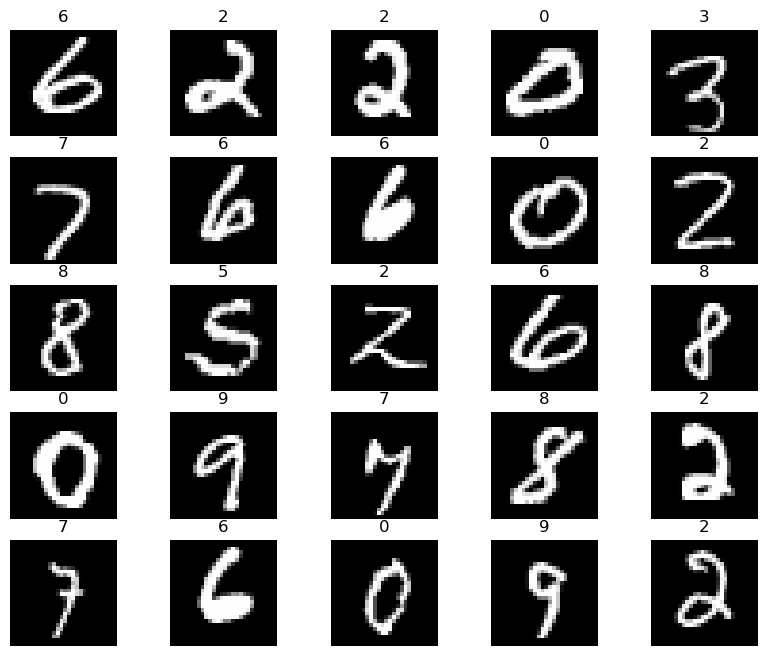

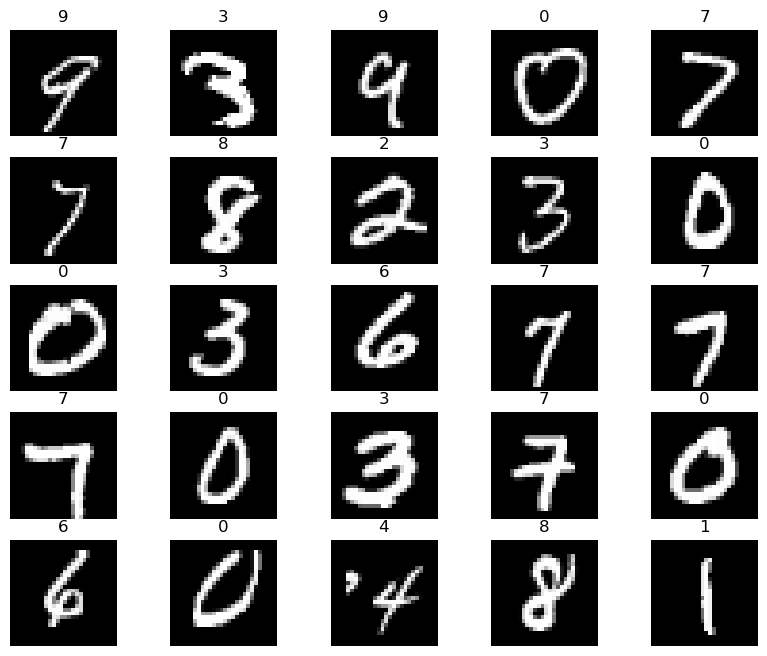

60000
60000


In [3]:
# Define a function to visualize QMNIST samples
def visualize_qmnist_samples(qmnist_dataset, cols=5, rows=5):
    figure = plt.figure(figsize=(10, 8))

    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(qmnist_dataset), size=(1,)).item()
        img, label = qmnist_dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")

    plt.show()

# Visualize some samples from the QMNIST training set
visualize_qmnist_samples(qmnist_trainset)

# Visualize some samples from the QMNIST test set
visualize_qmnist_samples(qmnist_testset)

# Print the number of samples in the QMNIST training and test sets
print(len(qmnist_trainset))  # Number of samples in the QMNIST training set
print(len(qmnist_testset))   # Number of samples in the QMNIST test set

In [4]:
# Create data loaders
train_loader = DataLoader(qmnist_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(qmnist_testset, batch_size=64, shuffle=False)

### Step 3: Report on the results in terms of prediction accuracy on train and test datasets

#### Define functions to train the model and evaluate results


In [5]:
import torch
import torch.nn as nn

class QMNIST(nn.Module):
    def __init__(self):
        super(QMNIST, self).__init__()
        # Defining the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Defining the second fully connected layer with 64 neurons
        self.fc2 = nn.Linear(128, 64)
        # Defining the output layer with 10 neurons for classification
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flattening the input tensor
        x = x.view(-1, 28 * 28)
        # Passing through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))
        # Passing through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))
        # Passing through the output layer (no activation applied)
        x = self.fc3(x)
        return x

# Initializing the neural network
model = QMNIST()

#### Training the Model

In [6]:
# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0583825033903123
Epoch 1, Batch 200, Loss: 0.3849826803803444
Epoch 1, Batch 300, Loss: 0.3090138679742813
Epoch 1, Batch 400, Loss: 0.28802047051489355
Epoch 1, Batch 500, Loss: 0.27917212903499605
Epoch 1, Batch 600, Loss: 0.2324642464518547
Epoch 1, Batch 700, Loss: 0.2260913085192442
Epoch 1, Batch 800, Loss: 0.198354956433177
Epoch 1, Batch 900, Loss: 0.1846549928933382
Epoch 2, Batch 100, Loss: 0.1755163748189807
Epoch 2, Batch 200, Loss: 0.1546957380324602
Epoch 2, Batch 300, Loss: 0.1450771271251142
Epoch 2, Batch 400, Loss: 0.1359562617354095
Epoch 2, Batch 500, Loss: 0.15112638810649515
Epoch 2, Batch 600, Loss: 0.13854326440021394
Epoch 2, Batch 700, Loss: 0.1404126668535173
Epoch 2, Batch 800, Loss: 0.1265648956038058
Epoch 2, Batch 900, Loss: 0.11515430992469192
Epoch 3, Batch 100, Loss: 0.10285710297524929
Epoch 3, Batch 200, Loss: 0.1009433925524354
Epoch 3, Batch 300, Loss: 0.0995222636591643
Epoch 3, Batch 400, Loss: 0.1024948865827173
Epoch

#### Evaluate the model prediction accuracy on the train and test datasets

In [7]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate on train dataset
train_accuracy = evaluate(model, train_loader)
print('Accuracy on train set: {:.2f}%'.format(train_accuracy * 100))

# Evaluate on test dataset
test_accuracy = evaluate(model, test_loader)
print('Accuracy on test set: {:.2f}%'.format(test_accuracy * 100))

Accuracy on train set: 98.55%
Accuracy on test set: 97.08%


### Step 4: Choosing to add another dense layer of 128 nodes 

#### This will likely increase the model's capacity to capture more complex patterns in the data. This additional layer would introduce more parameters and non-linearity to the model, thus enabling it to learn more intricate features from the input images.

### Step 5: Modify the model based on the chosen method and train

In [8]:
import torch
import torch.nn as nn

class QMNIST(nn.Module):
    def __init__(self):
        super(QMNIST, self).__init__()
        # Define the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Define the second fully connected layer with 128 neurons
        self.fc2 = nn.Linear(128, 128)  # New layer
        # Define the third fully connected layer with 64 neurons
        self.fc3 = nn.Linear(128, 64)
        # Define the output layer with 10 neurons for classification
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Pass through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))
        # Pass through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))
        # Pass through the third fully connected layer and apply ReLU activation
        x = torch.relu(self.fc3(x))
        # Pass through the output layer (no activation applied)
        x = self.fc4(x)
        return x

# Initialize the neural network
model = QMNIST()

#### Training the modified model

In [9]:
# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1045763471722603
Epoch 1, Batch 200, Loss: 0.41864214807748795
Epoch 1, Batch 300, Loss: 0.347156842648983
Epoch 1, Batch 400, Loss: 0.28515697628259656
Epoch 1, Batch 500, Loss: 0.24955991461873053
Epoch 1, Batch 600, Loss: 0.2264727857708931
Epoch 1, Batch 700, Loss: 0.20993932500481605
Epoch 1, Batch 800, Loss: 0.19649285174906253
Epoch 1, Batch 900, Loss: 0.16304985588416457
Epoch 2, Batch 100, Loss: 0.15375375982373954
Epoch 2, Batch 200, Loss: 0.14410919904708863
Epoch 2, Batch 300, Loss: 0.14649828460998834
Epoch 2, Batch 400, Loss: 0.13867556370794773
Epoch 2, Batch 500, Loss: 0.13164708039723336
Epoch 2, Batch 600, Loss: 0.12574431037530304
Epoch 2, Batch 700, Loss: 0.11510399904102087
Epoch 2, Batch 800, Loss: 0.12289659230038524
Epoch 2, Batch 900, Loss: 0.12534292912110687
Epoch 3, Batch 100, Loss: 0.10284385576844216
Epoch 3, Batch 200, Loss: 0.10103631908074022
Epoch 3, Batch 300, Loss: 0.09012259062379599
Epoch 3, Batch 400, Loss: 0.0923604371

In [10]:
# Function to calculate accuracy
def evaluate_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()  # Set model to evaluation mode (no dropout, batchnorm, etc.)
    with torch.no_grad():  # Disable gradient calculation
        for data, labels in data_loader:
            outputs = model(data)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Update total count
            correct += (predicted == labels).sum().item()  # Update correct count
    accuracy = 100 * correct / total
    return accuracy

# Print accuracy on training set
train_accuracy = evaluate_accuracy(model, train_loader)
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Print accuracy on test set
test_accuracy = evaluate_accuracy(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 98.64%
Test Accuracy: 97.22%


### Step 6: Report on the results of the modified model and if it matches your hypothesis

### The results of the modified model are as follows,


*   Adding another dense layer of 128 nodes enhanced the model's capacity to learn complex patterns and representations from the data.
*   The increase in accuracy from 97.08% to 97.22% suggests that the additional layer contributed positively to the model's performance.
*   This improvement implies better feature extraction, reduced overfitting, and dataset-specific benefits, leading to a slight enhancement in accuracy on the test set.

### Step 7: Experimenting with different Hyperparameters

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Defining the neural network architecture
class QMNIST(nn.Module):
    def __init__(self, dropout_rate=0.0, activation_fn=torch.relu):
        super(QMNIST, self).__init__()
        # Define the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Define the second fully connected layer with 128 neurons
        self.fc2 = nn.Linear(128, 128)  # New layer
        # Define the third fully connected layer with 64 neurons
        self.fc3 = nn.Linear(128, 64)
        # Define the output layer with 10 neurons for classification
        self.fc4 = nn.Linear(64, 10)
        # Define dropout layer
        self.dropout = nn.Dropout(dropout_rate)
        # Define activation function
        self.activation_fn = activation_fn

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Pass through the first fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc1(x))
        x = self.dropout(x)
        # Pass through the second fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc2(x))
        x = self.dropout(x)
        # Pass through the third fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc3(x))
        x = self.dropout(x)
        # Pass through the output layer (no activation applied)
        x = self.fc4(x)
        return x

# Defining the function to train the model
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Defining function to evaluate the model
def evaluate(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Defining hyperparameters
learning_rate = 0.001
dropout_rate = 0.2
activation_fn = torch.relu

# Initializing the model
model = QMNIST(dropout_rate=dropout_rate, activation_fn=activation_fn)

# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

print('Finished Training')

# Printing the model performance
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10, Train Loss: 0.4300, Test Accuracy: 0.9510
Epoch 2/10, Train Loss: 0.1817, Test Accuracy: 0.9647
Epoch 3/10, Train Loss: 0.1382, Test Accuracy: 0.9699
Epoch 4/10, Train Loss: 0.1144, Test Accuracy: 0.9704
Epoch 5/10, Train Loss: 0.1008, Test Accuracy: 0.9724
Epoch 6/10, Train Loss: 0.0924, Test Accuracy: 0.9743
Epoch 7/10, Train Loss: 0.0825, Test Accuracy: 0.9745
Epoch 8/10, Train Loss: 0.0753, Test Accuracy: 0.9761
Epoch 9/10, Train Loss: 0.0726, Test Accuracy: 0.9749
Epoch 10/10, Train Loss: 0.0661, Test Accuracy: 0.9765
Finished Training
Test Accuracy: 0.9765


##### The output indicates the performance of the neural network model on the test data after training for 10 epochs with the specified hyperparameters. Here's the breakdown:
- The training loss decreases gradually over epochs, indicating that the model is learning and improving its fit to the training data.
- The test accuracy increases over epochs, reaching 97.65% after 10 epochs. This indicates that the model is generalizing well to unseen data and performing better with the specified hyperparameters compared to previous epochs.

Overall, the change in hyperparameters has led to <b>improvements in the model's performance</b>, as evidenced by the decreasing loss and increasing accuracy on the test dataset.

#### Prediction on Test Set

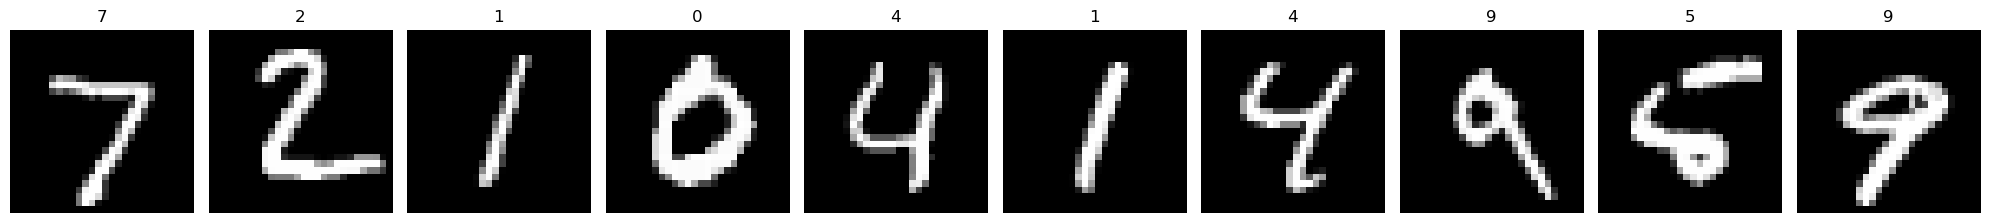

Thus, the model makes correct predictions on the test data above.


In [18]:
import matplotlib.pyplot as plt
import torch

def visualize_image_and_predictions(images, labels, predictions):
    # predictions on test data
    fig, axes = plt.subplots(ncols=10, figsize=(20, 4)) 
    axes = axes.flatten()
    
    for i in range(10):
        img = images[i].squeeze()
        true_label = labels[i].item()
        predicted_label = predictions[i].item()
        
        axes[i].imshow(img, cmap='gray')  
        axes[i].set_title(f'{predicted_label}', fontsize=12) 
        axes[i].axis('off') 
    
    plt.tight_layout()
    plt.show()

# Get a batch of test images and labels from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Run the model on the test images to get predictions
outputs = model(images)
_, predictions = torch.max(outputs, 1)

# Call the visualization function
visualize_image_and_predictions(images, labels, predictions)

## Thus, the model makes correct predictions on the test data above.